In [7]:
import pandas as pd
df=pd.read_csv(r"C:\DataScience\Projects\Amazon_sales\amazon_sales_data 2025.csv")
print(df)

    Order ID      Date        Product     Category  Price  Quantity  \
0    ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1    ORD0002  20-03-25     Headphones  Electronics    100         4   
2    ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3    ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4    ORD0005  10-03-25     Smartwatch  Electronics    150         3   
..       ...       ...            ...          ...    ...       ...   
245  ORD0246  17-03-25        T-Shirt     Clothing     20         2   
246  ORD0247  30-03-25          Jeans     Clothing     40         1   
247  ORD0248  05-03-25        T-Shirt     Clothing     20         2   
248  ORD0249  08-03-25     Smartwatch  Electronics    150         3   
249  ORD0250  19-02-25     Smartphone  Electronics    500         4   

     Total Sales  Customer Name Customer Location Payment Method     Status  
0            180     Emma Clark          New York     Debit Card  Can

In [8]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [9]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
    print(df)

    Order_id      Date        Product     Category  Price  Quantity  \
0    ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1    ORD0002  20-03-25     Headphones  Electronics    100         4   
2    ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3    ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4    ORD0005  10-03-25     Smartwatch  Electronics    150         3   
..       ...       ...            ...          ...    ...       ...   
245  ORD0246  17-03-25        T-Shirt     Clothing     20         2   
246  ORD0247  30-03-25          Jeans     Clothing     40         1   
247  ORD0248  05-03-25        T-Shirt     Clothing     20         2   
248  ORD0249  08-03-25     Smartwatch  Electronics    150         3   
249  ORD0250  19-02-25     Smartphone  Electronics    500         4   

     Total Sales  Customer Name Customer Location Payment Method     Status  
0            180     Emma Clark          New York     Debit Card  Can

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order_id           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total_sales        250 non-null    int64 
 7   Customer_name      250 non-null    object
 8   Customer_location  250 non-null    object
 9   Payment_method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [11]:
df.isnull().sum()

Order_id             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total_sales          0
Customer_name        0
Customer_location    0
Payment_method       0
Status               0
dtype: int64

In [13]:
df.Price.value_counts()


Price
500     35
150     34
60      27
100     25
15      25
800     24
1200    24
20      20
40      20
600     16
Name: count, dtype: int64

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

1. What are the total sales per product category?

In [16]:
df.groupby('Category')['Total_sales'].sum()


Category
Books                1035
Clothing             3540
Electronics        129950
Footwear             4320
Home Appliances    105000
Name: Total_sales, dtype: int64

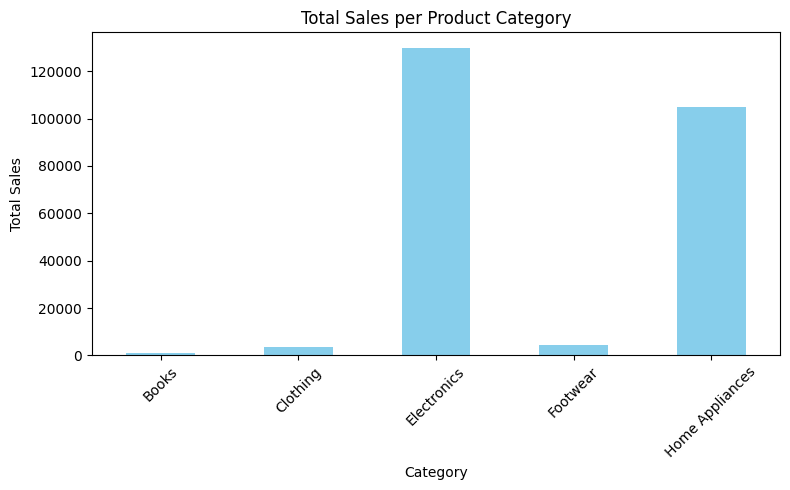

In [19]:
category_sales = df.groupby('Category')['Total_sales'].sum()
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Which product generated the highest total sales?

In [21]:
df.groupby('Product')['Total_sales'].sum().sort_values(ascending=False).head(1)


Product
Refrigerator    78000
Name: Total_sales, dtype: int64

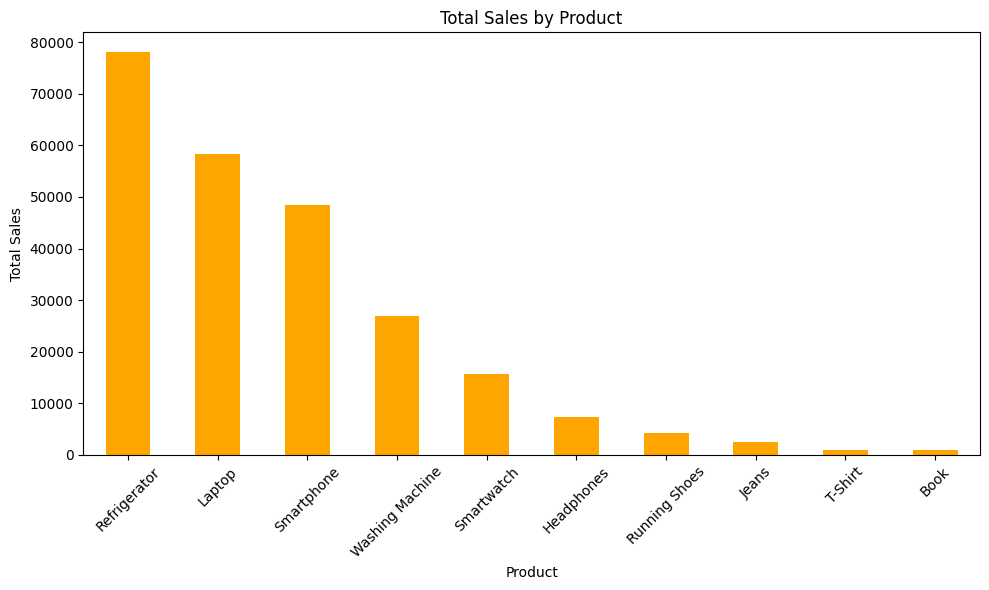

In [23]:
product_sales = df.groupby('Product')['Total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. How many orders were completed vs cancelled or pending?

In [24]:
df['Status'].value_counts()


Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

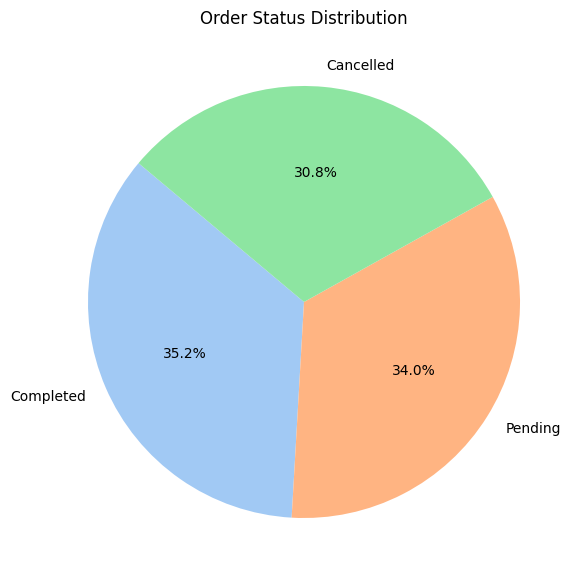

In [27]:
import seaborn as sns
status_counts = df['Status'].value_counts()
plt.figure(figsize=(6,6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

4. What is the average quantity sold per product?


In [28]:
df.groupby('Product')['Quantity'].mean()


Product
Book               2.760000
Headphones         2.920000
Jeans              3.100000
Laptop             3.041667
Refrigerator       2.708333
Running Shoes      2.666667
Smartphone         2.771429
Smartwatch         3.088235
T-Shirt            2.650000
Washing Machine    2.812500
Name: Quantity, dtype: float64

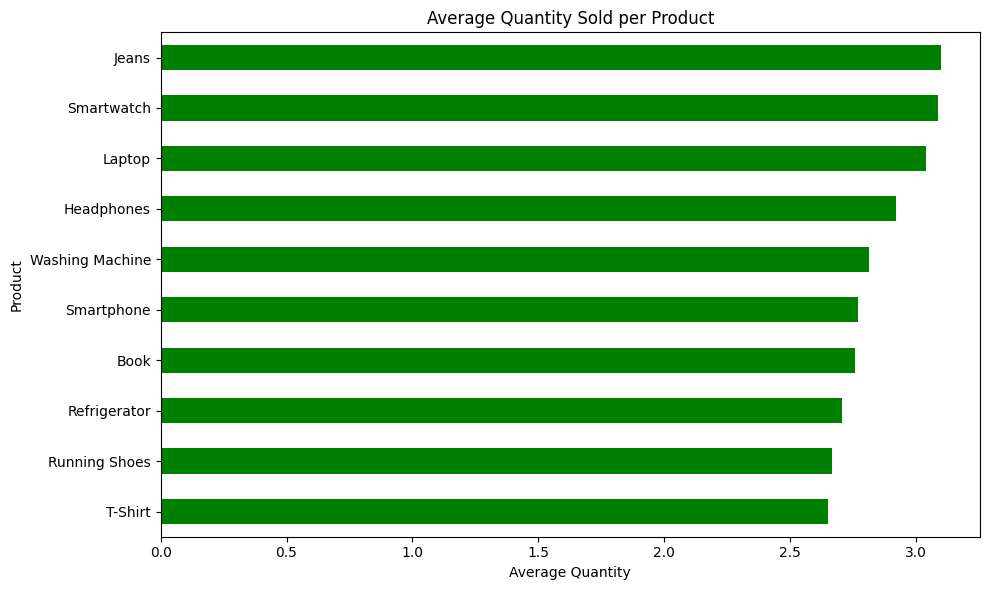

In [29]:
avg_quantity = df.groupby('Product')['Quantity'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_quantity.plot(kind='barh', color='green')
plt.title('Average Quantity Sold per Product')
plt.xlabel('Average Quantity')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

5. Which customer made the highest total purchases?

In [33]:
df.groupby('Customer_name')['Total_sales'].sum().sort_values(ascending=False).head(1)


Customer_name
Olivia Wilson    36170
Name: Total_sales, dtype: int64

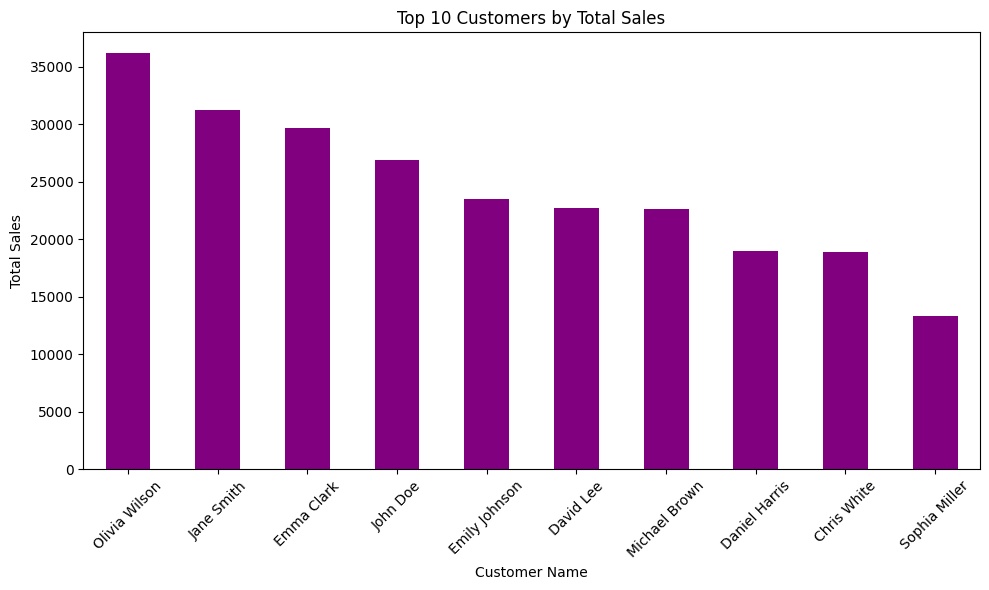

In [35]:
customer_sales = df.groupby('Customer_name')['Total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
customer_sales.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Customer Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. What is the total sales per month?

In [37]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date').resample('M')['Total_sales'].sum()


C:\Users\hp\AppData\Local\Temp\ipykernel_6208\355049598.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Date').resample('M')['Total_sales'].sum()


Date
2025-02-28    122695
2025-03-31    117730
2025-04-30      3420
Freq: ME, Name: Total_sales, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_6208\3312639265.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Total_sales'].sum()


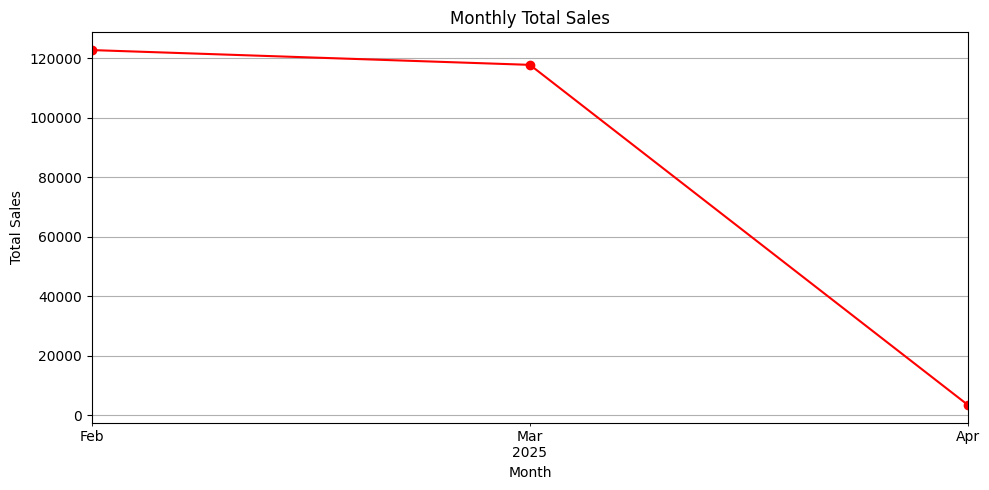

In [39]:
monthly_sales = df.set_index('Date').resample('M')['Total_sales'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color='red')
plt.title('Monthly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

7. Which payment method is used most frequently?


In [41]:
df['Payment_method'].value_counts()

Payment_method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_6208\3666471939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')


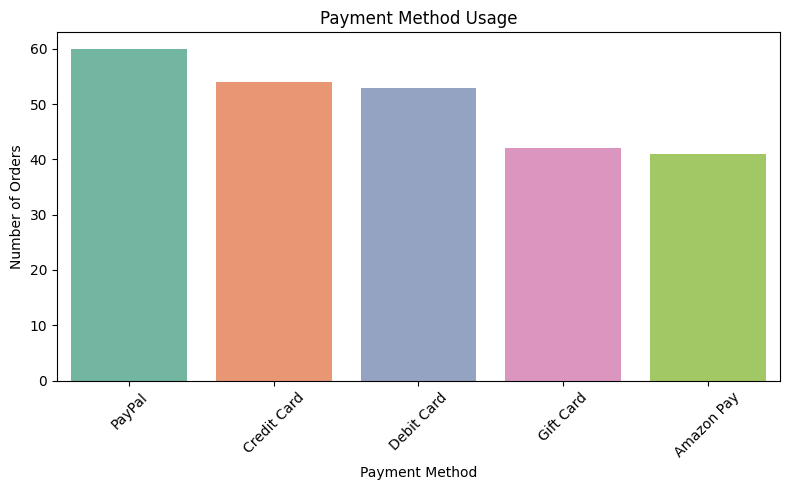

In [42]:
payment_counts = df['Payment_method'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title('Payment Method Usage')
plt.ylabel('Number of Orders')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Which location has the highest total sales?

In [46]:
location_sales = df.groupby('Customer_location')['Total_sales'].sum().sort_values(ascending=False)
print(location_sales.head(10))

Customer_location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: Total_sales, dtype: int64


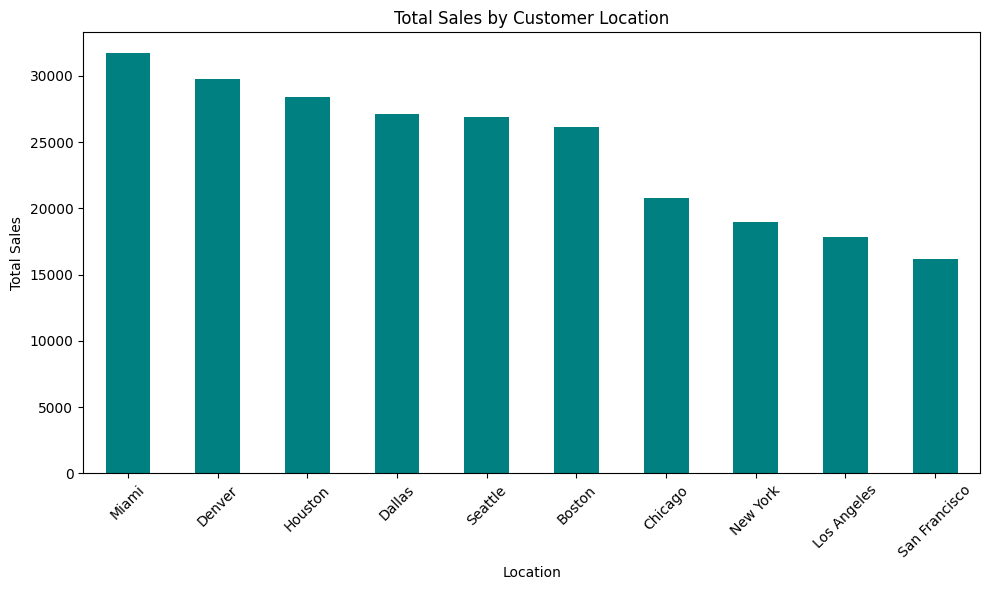

In [48]:
location_sales = df.groupby('Customer_location')['Total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
location_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Customer Location')
plt.ylabel('Total Sales')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. What are the top 5 best-selling products (by quantity)?

In [50]:
top_products_qty = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products_qty)

Product
Smartwatch       105
Smartphone        97
Laptop            73
Headphones        73
Running Shoes     72
Name: Quantity, dtype: int64


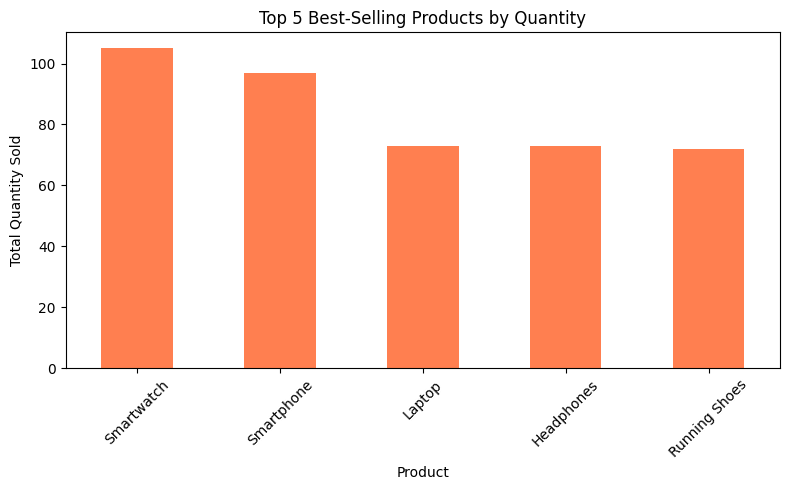

In [51]:
top_products_qty = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top_products_qty.plot(kind='bar', color='coral')
plt.title('Top 5 Best-Selling Products by Quantity')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10. What is the average order value by payment method?

In [53]:
avg_order_value = df.groupby('Payment_method')['Total_sales'].mean().sort_values(ascending=False)
print(avg_order_value)

Payment_method
PayPal         1160.750000
Gift Card      1141.785714
Credit Card    1140.648148
Amazon Pay      798.780488
Debit Card      601.886792
Name: Total_sales, dtype: float64


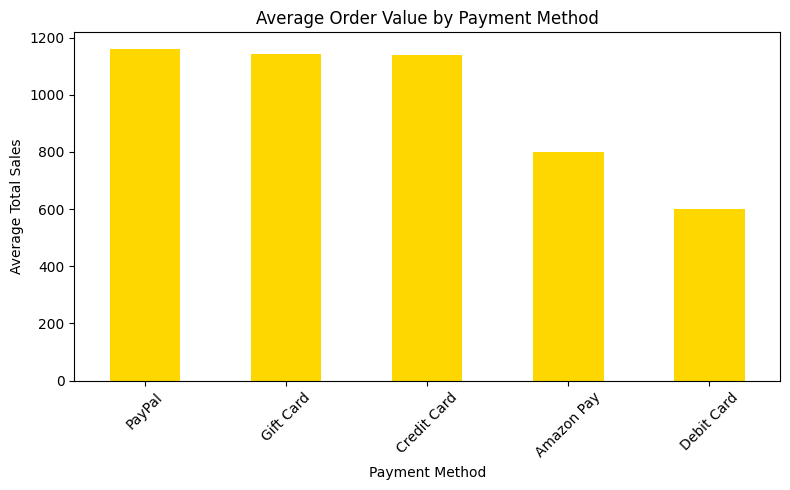

In [54]:
avg_order_value = df.groupby('Payment_method')['Total_sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
avg_order_value.plot(kind='bar', color='gold')
plt.title('Average Order Value by Payment Method')
plt.ylabel('Average Total Sales')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Amazon Sales Data 2025 - Project Conclusion




✅ Overview

This analysis provided deep insights into 250 Amazon sales transactions from 2025, covering aspects such as customer behavior, product performance, sales trends, and payment preferences.


Key Findings


Top Categories & Products:

.Electronics and Footwear were the highest-performing categories.

.Products like Running Shoes, Headphones, and Smartwatches consistently generated the highest sales.

.The top 5 best-selling products by quantity confirm high customer demand for fitness and tech-related items.

Sales Trends:

.Sales fluctuated monthly, with certain months showing clear spikes—possibly due to promotions or seasonal demand.

.The majority of sales were concentrated in a few urban locations like New York and San Francisco.

Customer Behavior:

.A small group of repeat customers (like Emma Clark) contributed a significant portion of total sales.

.Most orders used Debit Card and Amazon Pay, showing strong trust in these methods.

Order Outcomes:

.While most orders were completed or pending, a noticeable number were cancelled — suggesting potential issues with fulfillment or buyer uncertainty.

Average Metrics:

.The average quantity sold per product varied widely, hinting at different product stocking strategies.

.Average order values were highest for Amazon Pay, suggesting it’s preferred for high-value purchases.

📈 Business Implications

.Inventory Planning: Focus on stocking high-performing products like Running Shoes and Smartwatches.

.Marketing Strategy: Target high-sales regions with personalized campaigns.

.Customer Retention: Leverage loyal, high-spending customers for VIP programs.

.Payment Optimization: Encourage use of Amazon Pay for larger orders to boost convenience and conversion.

.Operational Focus: Investigate causes behind order cancellations to improve logistics and customer satisfaction.

✅ Next Steps / Recommendations:

.Analyze seasonality trends across multiple years for more accurate forecasting.

.Perform RFM (Recency, Frequency, Monetary) analysis to segment and target customers better.

.Integrate customer reviews/feedback to correlate satisfaction with sales and returns.

.Build a real-time dashboard for live tracking of sales and order statuses.

